<a href="https://colab.research.google.com/github/milagjurovska/PPI-link-prediction-with-optimized-gan/blob/main/ppi_link_prediction_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
from torch_geometric.utils import train_test_split_edges
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GAE
import networkx as nx

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PP-Pathways_ppi.csv to PP-Pathways_ppi.csv


In [ ]:
columns=["protein1", "protein2"]
df=pd.read_csv("PP-Pathways_ppi.csv", names=columns)
df.head()

,protein1,protein2
0,1394,2778
1,6331,17999
2,122704,54460
3,2597,2911
4,4790,79155


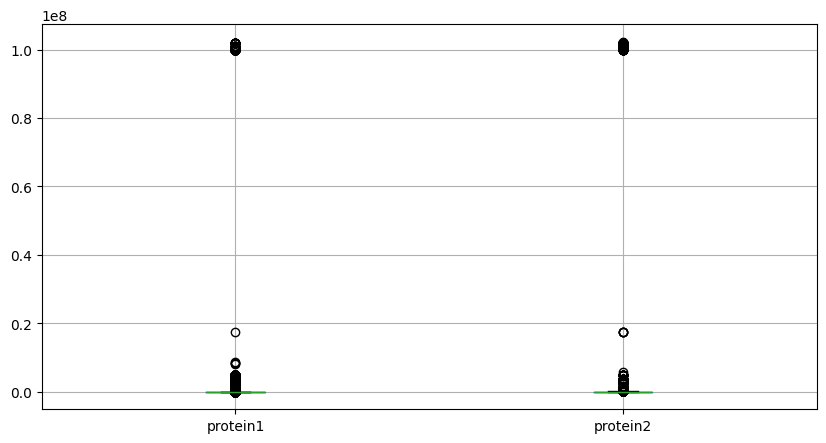

In [ ]:
fig=plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [ ]:
edges = []
with open('PP-Pathways_ppi.csv', 'r') as f:
    for line in f:
        line = line.strip()
        if ',' in line:
            u, v = line.split(',')
            edges.append( (int(u), int(v)) )

G = nx.Graph()
G.add_edges_from(edges)
print(G)

Graph with 21557 nodes and 342353 edges


In [ ]:
edge_index = torch.tensor(list(G.edges())).t().contiguous()

node_degrees = np.array([G.degree(n) for n in G.nodes()])
node_degrees = node_degrees.reshape(-1, 1)
x = torch.tensor(node_degrees, dtype=torch.float)

[12 98 33 ...  1  1  1]
